"figura.add_subplot(1,4,4)\nplt.imshow(mask2, cmap='gray', vmin=0, vmax=255)\nplt.title(f'Source')"

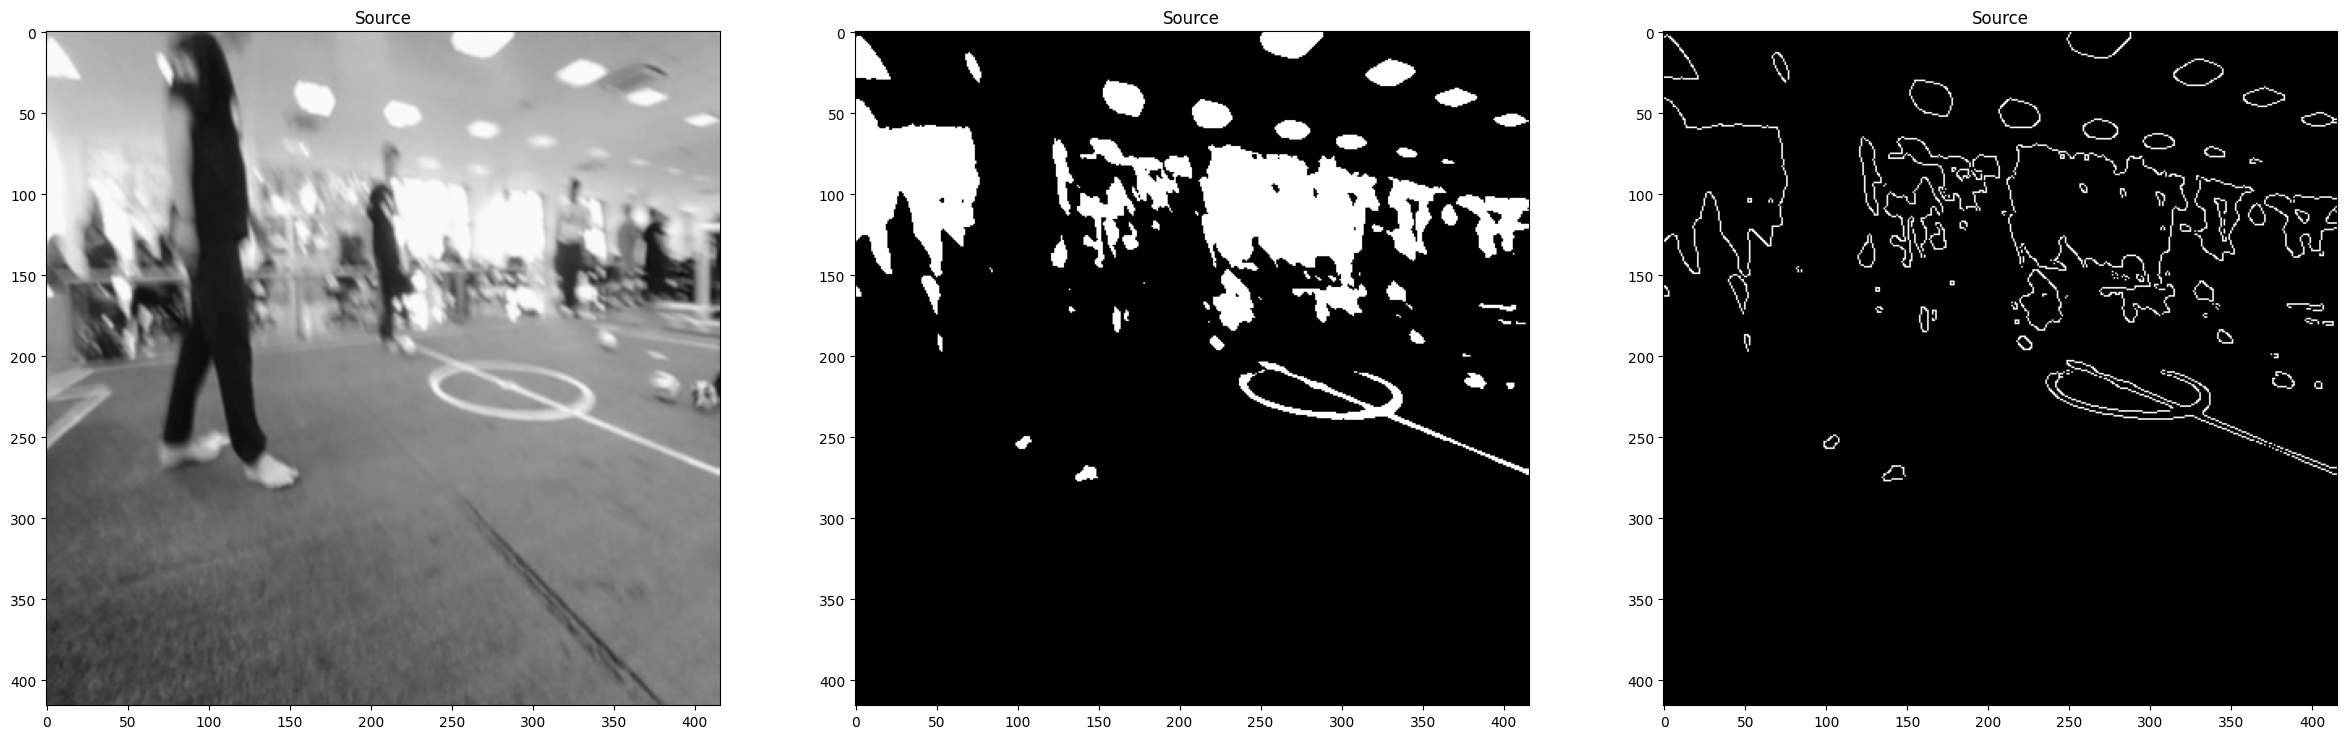

In [25]:
import math
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

filename = 'img/teste3.jpg'

# Loads an image
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.GaussianBlur(img,(3,3),0)

mask = np.zeros(img.shape).astype('uint8')
mask[img > 200] = int(255)


dst = cv.Canny(mask, 50, 200)
lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

# Copy edges to the images that will display the results in BGR
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)






figura = plt.figure(figsize = (40,40))

figura.add_subplot(1,4,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title(f'Source')

figura.add_subplot(1,4,2)
plt.imshow(mask, cmap='gray', vmin=0, vmax=255)
plt.title(f'Source')

figura.add_subplot(1,4,3)
plt.imshow(cdst, cmap='gray', vmin=0, vmax=255)
plt.title(f'Source')

'''figura.add_subplot(1,4,4)
plt.imshow(mask2, cmap='gray', vmin=0, vmax=255)
plt.title(f'Source')'''





In [12]:
help(cv.Canny)

Help on built-in function Canny:

Canny(...)
    Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) -> edges
    .   @brief Finds edges in an image using the Canny algorithm @cite Canny86 .
    .   
    .   The function finds edges in the input image and marks them in the output map edges using the
    .   Canny algorithm. The smallest value between threshold1 and threshold2 is used for edge linking. The
    .   largest value is used to find initial segments of strong edges. See
    .   <http://en.wikipedia.org/wiki/Canny_edge_detector>
    .   
    .   @param image 8-bit input image.
    .   @param edges output edge map; single channels 8-bit image, which has the same size as image .
    .   @param threshold1 first threshold for the hysteresis procedure.
    .   @param threshold2 second threshold for the hysteresis procedure.
    .   @param apertureSize aperture size for the Sobel operator.
    .   @param L2gradient a flag, indicating whether a more accurate \